# Data preparation

## Keyword Vectorizer

In [1]:
from sentence_transformers import SentenceTransformer

import pandas as pd
import numpy as np

model = SentenceTransformer('all-MiniLM-L6-v2')

co_fcev = pd.read_csv("co_word_network(FCEV).csv", index_col=0)

fcev_384 = pd.DataFrame (map(model.encode, co_fcev.index), index=co_fcev.index)
fcev_384

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
KEYWORD,,,,,,,,,,,,,,,,,,,,,
fuel cell,-0.066598,0.106213,-0.082087,0.051746,0.022713,-0.003620,0.084233,0.087839,0.037856,-0.074218,...,-0.041643,-0.020619,-0.128440,0.054916,0.060411,-0.014199,0.025187,0.066870,0.075452,0.048099
proton exchange membrane fuel cell,-0.052879,0.034866,-0.070353,0.049883,-0.021382,-0.008082,0.098632,0.085263,0.025449,-0.101452,...,-0.037347,0.036079,-0.099891,0.035316,0.037815,0.002394,0.018579,0.025868,0.072842,0.029415
hydrogen,-0.056251,0.039564,-0.030349,0.083267,0.064322,-0.010428,0.087461,0.057175,-0.010859,-0.077428,...,0.003663,0.050733,-0.041290,-0.002366,-0.034717,-0.013247,0.178267,0.014661,0.104777,0.077658
membrane,-0.092494,-0.067662,-0.048400,-0.001504,-0.063390,-0.055247,0.168926,0.065735,0.082033,-0.059433,...,-0.038742,0.012939,-0.057354,0.010658,-0.034997,0.058676,0.031009,0.055880,0.114817,0.014474
catalyst,-0.078917,-0.009425,-0.053639,0.075120,0.051433,-0.014589,0.048982,0.020239,-0.042510,-0.061810,...,0.031145,-0.034518,-0.052340,0.001776,0.012354,-0.021327,0.163356,0.070673,0.166602,-0.030630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
membrane electrolyte assembly,-0.069846,0.004165,-0.038003,-0.021865,-0.056611,-0.054746,0.114702,0.007118,0.002218,-0.051127,...,-0.075984,0.026194,-0.096077,0.044086,-0.008162,0.050753,0.021136,0.016291,0.071629,-0.032277
pv array,0.011547,0.059216,-0.083384,-0.052951,-0.066823,-0.080696,0.062519,0.011689,-0.027957,-0.030748,...,0.001415,-0.048311,-0.078364,0.040191,0.052002,0.026353,0.047402,0.024178,-0.048137,-0.031242
multifunctional neural microelectrode,-0.013062,-0.070375,0.086032,-0.040500,-0.117570,0.019151,0.062975,0.018082,0.016656,0.047846,...,-0.022758,-0.023636,-0.011694,-0.062925,-0.075733,0.047112,0.010930,0.040009,0.049497,-0.018093


In [2]:
co_fcev = co_fcev.applymap(lambda x : 1 if x>=20 else 0) # 우선 가중치가 없는 네트워크로 진행

for i in co_fcev.index:
    co_fcev[i][i] = 0

co_fcev

,fuel cell,proton exchange membrane fuel cell,hydrogen,membrane,catalyst,polymer,electric vehicle,electrolyte membrane fuel cell,oxygen reduction reaction,membrane electrode assembly,...,methanol fuel cell,operating fuel cell,cathode degradation,electric powertrain,fc,membrane electrolyte assembly,pv array,multifunctional neural microelectrode,micro chp system,amino group
KEYWORD,,,,,,,,,,,,,,,,,,,,,
fuel cell,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
proton exchange membrane fuel cell,1,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
hydrogen,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
membrane,1,1,1,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
catalyst,1,1,1,1,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
membrane electrolyte assembly,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pv array,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
multifunctional neural microelectrode,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
import itertools
final = list(itertools.combinations(co_fcev.columns, 2))
len(final)

5112003

In [ ]:
len(final)

In [3]:
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import FullBatchLinkGenerator
from stellargraph.layer import GCN, LinkEmbedding

from stellargraph.mapper import GraphSAGELinkGenerator
from stellargraph.layer import GraphSAGE, HinSAGE, link_classification, AttentionalAggregator

from stellargraph.data import UnsupervisedSampler
from stellargraph.mapper import Attri2VecLinkGenerator, Attri2VecNodeGenerator
from stellargraph.layer import Attri2Vec, link_classification

from stellargraph.data import BiasedRandomWalk
from gensim.models import Word2Vec


from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection
from sklearn.model_selection import train_test_split

from stellargraph import globalvar
from stellargraph import datasets
from IPython.display import display, HTML
%matplotlib inline

import networkx as nx

import multiprocessing


RANDOM_SEED = 42
layer_sizes = [16,16]

In [4]:
adj_mat = co_fcev
node_features = fcev_384

In [5]:
G = sg.StellarGraph.from_networkx(nx.from_pandas_adjacency(adj_mat), node_features = node_features)

In [6]:
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 3198, Edges: 2110

 Node types:
  default: [3198]
    Features: float32 vector, length 384
    Edge types: default-default->default

 Edge types:
    default-default->default: [2110]
        Weights: all 1 (default)
        Features: none


In [7]:
# Define an edge splitter on the original graph G:
edge_splitter_test = EdgeSplitter(G)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G, and obtain the
# reduced graph G_test with the sampled links removed:
G_test, edge_ids_test, edge_labels_test = edge_splitter_test.train_test_split(
    p=0.1, method="global", keep_connected=True, seed = RANDOM_SEED 
)

** Sampled 211 positive and 211 negative edges. **


In [29]:
edge_ids_test

array([['energy management strategy', 'hybrid system'],
       ['proton exchange membrane fuel cell', 'electrical conductivity'],
       ['membrane', 'membrane electrode assembly'],
       ['composite membrane', 'nafion membrane'],
       ['proton exchange membrane fuel cell', 'carbon'],
       ['hydrogen production', 'exergy efficiency'],
       ['hydrogen', 'hydrogen fuel cell'],
       ['hydrogen production', 'renewable energy source'],
       ['fuel', 'cell'],
       ['electrode', 'microbial fuel cell'],
       ['battery', 'power'],
       ['flow field', 'pressure drop'],
       ['hybrid electric vehicle', 'supercapacitor'],
       ['battery', 'performance'],
       ['proton conductivity', 'methanol permeability'],
       ['electric vehicle', 'hydrogen production'],
       ['hydrogen production', 'electrolyzer'],
       ['membrane', 'electrochemical reaction'],
       ['catalyst layer', 'durability'],
       ['electric vehicle', 'fuel'],
       ['electrolyte membrane fuel cell', 'h

In [8]:
# Define an edge splitter on the reduced graph G_test:
edge_splitter_train = EdgeSplitter(G_test)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
# reduced graph G_train with the sampled links removed:
G_train, edge_ids_train, edge_labels_train = edge_splitter_train.train_test_split(
    p=0.1, method="global", keep_connected=True, seed = RANDOM_SEED
)

#Node2Vec
(
    examples_train,
    examples_model_selection,
    labels_train,
    labels_model_selection,
) = train_test_split(edge_ids_train, edge_labels_train, train_size=0.75, test_size=0.25)

** Sampled 189 positive and 189 negative edges. **


# GCN

In [ ]:
epochs = 2000

In [ ]:
train_gen = FullBatchLinkGenerator(G_train, method="gcn")
train_flow = train_gen.flow(edge_ids_train, edge_labels_train)

In [ ]:
test_gen = FullBatchLinkGenerator(G_test, method="gcn")
test_flow = train_gen.flow(edge_ids_test, edge_labels_test)

In [ ]:
gcn = GCN(
    layer_sizes=layer_sizes, activations=["relu", "relu"], generator=train_gen, dropout=0.3
)

In [ ]:
x_inp, x_out = gcn.in_out_tensors()

In [ ]:
prediction = LinkEmbedding(activation="relu", method="ip")(x_out)
prediction = keras.layers.Reshape((-1,))(prediction)

#rediction = link_classification(
#   output_dim=1, output_act="relu", edge_embedding_method="ip"
#(x_out)

In [ ]:
model_GCN = keras.Model(inputs=x_inp, outputs=prediction)

model_GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.binary_crossentropy,
    metrics=["binary_accuracy"],
)

init_train_metrics = model_GCN.evaluate(train_flow)
init_test_metrics = model_GCN.evaluate(test_flow)

print("\nTrain Set Metrics of the initial (untrained) model_GCN:")
for name, val in zip(model_GCN.metrics_names, init_train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the initial (untrained) model_GCN:")
for name, val in zip(model_GCN.metrics_names, init_test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

history_GCN = model_GCN.fit(
    train_flow, epochs=epochs, validation_data=test_flow, verbose=2, shuffle=True
)

In [ ]:
sg.utils.plot_history(history_GCN) # 실험 데이터의 feature는 7개의 class + 1433개의 단어 = 총 1440개의 feature
# 이유를 도저히 모르겠다

# GraphSAGE

In [ ]:
batch_size = 20
epochs = 200

num_samples = [20, 10]

In [ ]:
train_gen = GraphSAGELinkGenerator(G_train, batch_size, num_samples)
train_flow = train_gen.flow(edge_ids_train, edge_labels_train, shuffle=True)

test_gen = GraphSAGELinkGenerator(G_test, batch_size, num_samples)
test_flow = test_gen.flow(edge_ids_test, edge_labels_test)

In [ ]:
graphsage = GraphSAGE(
    layer_sizes=layer_sizes, generator=train_gen, bias=True, dropout=0.3
) #aggregator=AttentionalAggregator(),

In [ ]:
# Build the model and expose input and output sockets of graphsage model
# for link prediction
x_inp, x_out = graphsage.in_out_tensors()

In [ ]:
prediction = link_classification(
    output_dim=1, output_act="relu", edge_embedding_method="ip"
)(x_out)

In [ ]:
model_GSAGE = keras.Model(inputs=x_inp, outputs=prediction)

model_GSAGE.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.binary_crossentropy,
    metrics=["acc"],
)

init_train_metrics = model_GSAGE.evaluate(train_flow)
init_test_metrics = model_GSAGE.evaluate(test_flow)

print("\nTrain Set Metrics of the initial (untrained) model_GSAGE:")
for name, val in zip(model_GSAGE.metrics_names, init_train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the initial (untrained) model_GSAGE:")
for name, val in zip(model_GSAGE.metrics_names, init_test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

history_GSAGE = model_GSAGE.fit(train_flow, epochs=epochs, validation_data=test_flow, verbose=2, shuffle=True)

In [ ]:
sg.utils.plot_history(history_GSAGE)

# attri2vec

In [18]:
nodes = list(G_train.nodes())
number_of_walks = 4
length = 5

batch_size = 50
epochs = 200

In [19]:
unsupervised_samples_train = UnsupervisedSampler(
    G_train, nodes=nodes, length=length, number_of_walks=number_of_walks
)

train_gen = Attri2VecLinkGenerator(G_train, batch_size)
train_flow = train_gen.flow(unsupervised_samples_train)

In [20]:
unsupervised_samples_test = UnsupervisedSampler(
    G_test, nodes=nodes, length=length, number_of_walks=number_of_walks
)

test_gen = Attri2VecLinkGenerator(G_test, batch_size)
test_flow = test_gen.flow(unsupervised_samples_test)

In [21]:
dimension = [128]
attri2vec = Attri2Vec(
    layer_sizes=dimension, generator=train_gen, bias=False, normalize=None
)

In [22]:
# Build the model and expose input and output sockets of attri2vec, for node pair inputs:
x_inp, x_out = attri2vec.in_out_tensors()

In [23]:
prediction = link_classification(
    output_dim=1, output_act="sigmoid", edge_embedding_method="ip"
)(x_out)

link_classification: using 'ip' method to combine node embeddings into edge embeddings


In [24]:
model_attri = keras.Model(inputs=x_inp, outputs=prediction)

model_attri.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-2),
    loss=keras.losses.binary_crossentropy,
    metrics=[keras.metrics.binary_accuracy],
)

In [25]:
history_attri = model_attri.fit(
    train_flow,
    epochs=epochs,
    validation_data=test_flow,
    verbose=2,
    use_multiprocessing=False,
    workers=1,
    shuffle=True,
)

Epoch 1/200
376/376 - 3s - loss: 0.6969 - binary_accuracy: 0.5744 - val_loss: 0.6652 - val_binary_accuracy: 0.5944 - 3s/epoch - 9ms/step
Epoch 2/200
376/376 - 3s - loss: 0.6441 - binary_accuracy: 0.6291 - val_loss: 0.6266 - val_binary_accuracy: 0.6464 - 3s/epoch - 7ms/step
Epoch 3/200
376/376 - 3s - loss: 0.6193 - binary_accuracy: 0.6575 - val_loss: 0.6174 - val_binary_accuracy: 0.6610 - 3s/epoch - 7ms/step
Epoch 4/200
376/376 - 3s - loss: 0.6051 - binary_accuracy: 0.6673 - val_loss: 0.6038 - val_binary_accuracy: 0.6722 - 3s/epoch - 7ms/step
Epoch 5/200
376/376 - 3s - loss: 0.5954 - binary_accuracy: 0.6785 - val_loss: 0.5929 - val_binary_accuracy: 0.6812 - 3s/epoch - 7ms/step
Epoch 6/200
376/376 - 3s - loss: 0.5857 - binary_accuracy: 0.6879 - val_loss: 0.5906 - val_binary_accuracy: 0.6846 - 3s/epoch - 7ms/step
Epoch 7/200
376/376 - 3s - loss: 0.5730 - binary_accuracy: 0.6957 - val_loss: 0.5821 - val_binary_accuracy: 0.6877 - 3s/epoch - 7ms/step
Epoch 8/200
376/376 - 3s - loss: 0.5826 -

Epoch 61/200
376/376 - 3s - loss: 0.5548 - binary_accuracy: 0.7173 - val_loss: 0.5637 - val_binary_accuracy: 0.7097 - 3s/epoch - 7ms/step
Epoch 62/200
376/376 - 3s - loss: 0.5491 - binary_accuracy: 0.7227 - val_loss: 0.5559 - val_binary_accuracy: 0.7159 - 3s/epoch - 7ms/step
Epoch 63/200
376/376 - 3s - loss: 0.5479 - binary_accuracy: 0.7182 - val_loss: 0.5596 - val_binary_accuracy: 0.7135 - 3s/epoch - 7ms/step
Epoch 64/200
376/376 - 3s - loss: 0.5479 - binary_accuracy: 0.7178 - val_loss: 0.5620 - val_binary_accuracy: 0.7078 - 3s/epoch - 7ms/step
Epoch 65/200
376/376 - 3s - loss: 0.5505 - binary_accuracy: 0.7197 - val_loss: 0.5607 - val_binary_accuracy: 0.7102 - 3s/epoch - 7ms/step
Epoch 66/200
376/376 - 3s - loss: 0.5443 - binary_accuracy: 0.7203 - val_loss: 0.5725 - val_binary_accuracy: 0.7028 - 3s/epoch - 7ms/step
Epoch 67/200
376/376 - 3s - loss: 0.5438 - binary_accuracy: 0.7224 - val_loss: 0.5606 - val_binary_accuracy: 0.7142 - 3s/epoch - 7ms/step
Epoch 68/200
376/376 - 3s - loss: 

Epoch 121/200
376/376 - 3s - loss: 0.5412 - binary_accuracy: 0.7240 - val_loss: 0.5597 - val_binary_accuracy: 0.7140 - 3s/epoch - 7ms/step
Epoch 122/200
376/376 - 3s - loss: 0.5443 - binary_accuracy: 0.7264 - val_loss: 0.5550 - val_binary_accuracy: 0.7211 - 3s/epoch - 7ms/step
Epoch 123/200
376/376 - 3s - loss: 0.5381 - binary_accuracy: 0.7293 - val_loss: 0.5573 - val_binary_accuracy: 0.7139 - 3s/epoch - 7ms/step
Epoch 124/200
376/376 - 3s - loss: 0.5432 - binary_accuracy: 0.7241 - val_loss: 0.5644 - val_binary_accuracy: 0.7130 - 3s/epoch - 7ms/step
Epoch 125/200
376/376 - 3s - loss: 0.5375 - binary_accuracy: 0.7277 - val_loss: 0.5560 - val_binary_accuracy: 0.7177 - 3s/epoch - 7ms/step
Epoch 126/200
376/376 - 3s - loss: 0.5420 - binary_accuracy: 0.7265 - val_loss: 0.5593 - val_binary_accuracy: 0.7175 - 3s/epoch - 7ms/step
Epoch 127/200
376/376 - 3s - loss: 0.5411 - binary_accuracy: 0.7230 - val_loss: 0.5556 - val_binary_accuracy: 0.7151 - 3s/epoch - 7ms/step
Epoch 128/200
376/376 - 3s 

Epoch 180/200
376/376 - 3s - loss: 0.5460 - binary_accuracy: 0.7232 - val_loss: 0.5539 - val_binary_accuracy: 0.7188 - 3s/epoch - 7ms/step
Epoch 181/200
376/376 - 3s - loss: 0.5449 - binary_accuracy: 0.7246 - val_loss: 0.5564 - val_binary_accuracy: 0.7189 - 3s/epoch - 7ms/step
Epoch 182/200
376/376 - 3s - loss: 0.5467 - binary_accuracy: 0.7263 - val_loss: 0.5542 - val_binary_accuracy: 0.7157 - 3s/epoch - 8ms/step
Epoch 183/200
376/376 - 3s - loss: 0.5425 - binary_accuracy: 0.7306 - val_loss: 0.5585 - val_binary_accuracy: 0.7135 - 3s/epoch - 7ms/step
Epoch 184/200
376/376 - 3s - loss: 0.5450 - binary_accuracy: 0.7253 - val_loss: 0.5584 - val_binary_accuracy: 0.7124 - 3s/epoch - 7ms/step
Epoch 185/200
376/376 - 3s - loss: 0.5386 - binary_accuracy: 0.7289 - val_loss: 0.5596 - val_binary_accuracy: 0.7181 - 3s/epoch - 7ms/step
Epoch 186/200
376/376 - 3s - loss: 0.5400 - binary_accuracy: 0.7299 - val_loss: 0.5674 - val_binary_accuracy: 0.7115 - 3s/epoch - 8ms/step
Epoch 187/200
376/376 - 3s 

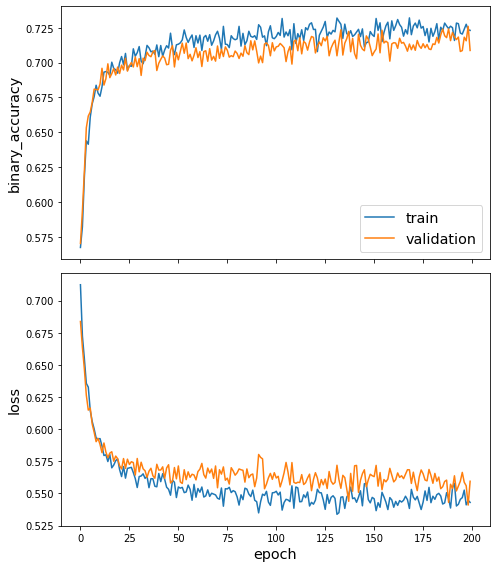

In [17]:
sg.utils.plot_history(history_attri) # 실험 데이터의 feature는 7개의 class + 1433개의 단어 = 총 1440개의 feature

# Node2Vec

In [ ]:
p = 1.0
q = 1.0
dimensions = 128
num_walks = 10
walk_length = 80
window_size = 10
num_iter = 1
workers = 1 #randomness 제거

In [ ]:
def node2vec_embedding(graph, name):
    rw = BiasedRandomWalk(graph, seed=RANDOM_SEED)
    walks = rw.run(graph.nodes(), n=num_walks, length=walk_length, p=p, q=q)
    print(f"Number of random walks for '{name}': {len(walks)}")

    model = Word2Vec(
        walks,
        vector_size=dimensions,
        window=window_size,
        min_count=0,
        sg=1,
        workers=workers,
        epochs=num_iter,
        seed=RANDOM_SEED
    )

    def get_embedding(u):
        return model.wv[u]

    return get_embedding

In [ ]:
embedding_train = node2vec_embedding(G_train, "Train Graph")

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler


# 1. link embeddings
def link_examples_to_features(link_examples, transform_node, binary_operator):
    return [
        binary_operator(transform_node(src), transform_node(dst))
        for src, dst in link_examples
    ]


# 2. training classifier
def train_link_prediction_model(
    link_examples, link_labels, get_embedding, binary_operator
):
    clf = link_prediction_classifier()
    link_features = link_examples_to_features(
        link_examples, get_embedding, binary_operator
    )
    clf.fit(link_features, link_labels)
    return clf


def link_prediction_classifier(max_iter=2000):
    lr_clf = LogisticRegressionCV(Cs=10, cv=10, scoring="roc_auc", max_iter=max_iter)
    return Pipeline(steps=[("sc", StandardScaler()), ("clf", lr_clf)])


# 3. and 4. evaluate classifier
def evaluate_link_prediction_model(
    clf, link_examples_test, link_labels_test, get_embedding, binary_operator
):
    link_features_test = link_examples_to_features(
        link_examples_test, get_embedding, binary_operator
    )
    score = evaluate_acc(clf, link_features_test, link_labels_test)
    return score


def evaluate_acc(clf, link_features, link_labels):
    predicted = clf.predict(link_features)
    
    # check which class corresponds to positive links
    positive_column = list(clf.classes_).index(1)
    return accuracy_score(link_labels, predicted)

In [ ]:
def operator_hadamard(u, v):
    return u * v


def operator_l1(u, v):
    return np.abs(u - v)


def operator_l2(u, v):
    return (u - v) ** 2


def operator_avg(u, v):
    return (u + v) / 2.0


def run_link_prediction(binary_operator):
    clf = train_link_prediction_model(
        examples_train, labels_train, embedding_train, binary_operator
    )
    score = evaluate_link_prediction_model(
        clf,
        examples_model_selection,
        labels_model_selection,
        embedding_train,
        binary_operator,
    )

    return {
        "classifier": clf,
        "binary_operator": binary_operator,
        "score": score,
    }


binary_operators = [operator_hadamard, operator_l1, operator_l2, operator_avg]

In [ ]:
results = [run_link_prediction(op) for op in binary_operators]
best_result = max(results, key=lambda result: result["score"])

print(f"Best result from '{best_result['binary_operator'].__name__}'")

pd.DataFrame(
    [(result["binary_operator"].__name__, result["score"]) for result in results],
    columns=("name", "Accuracy score"),
).set_index("name")

In [ ]:
embedding_test = node2vec_embedding(G_test, "Test Graph")

In [ ]:
test_score = evaluate_link_prediction_model(
    best_result["classifier"],
    edge_ids_test,
    edge_labels_test,
    embedding_test,
    best_result["binary_operator"],
)
print(
    f"ROC AUC score on test set using '{best_result['binary_operator'].__name__}': {test_score}"
)

In [37]:
model_attri.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 384)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 128)          49152       ['input_3[0][0]']                
                                                                                                  
 output_embedding (Embedding)   (None, 1, 128)       409344      ['input_4[0][0]']                
                                                                                            